# Veriye Ilk Bakis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='red'>Ozel Ayarlar</font>

In [2]:
import warnings
warnings.simplefilter(action='ignore')

#Butun kolon ve satirlari gormek icin
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#virgulden sonra gösterilecek olan sayı 2 basamak olarak ayarlanıyor.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")

In [3]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
1,Radial Velocity,1,874.77,2.21,56.95,2008
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009


# 00_ilk Soru =  Veri Setinin Hikayesi nedir ?

##  Bilesenlerin Olusma Hikayesi nedir ?

# 01) df = file.copy  (Kopya Almak)

In [4]:
df = planets.copy()

In [5]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
1,Radial Velocity,1,874.77,2.21,56.95,2008
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009


In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.94,NaN,172.00,2006
1031,Transit,1,2.62,NaN,148.00,2007
1032,Transit,1,3.19,NaN,174.00,2007
1033,Transit,1,4.13,NaN,293.00,2008
1034,Transit,1,4.19,NaN,260.00,2008


# Veri Seti Yapisal Bilgileri

# 02) df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


# 03) df.dtypes

In [8]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

# 04)  odbject to category degistir

In [9]:
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [10]:
type(df.method)

pandas.core.series.Series

# 05) df.describe()  ====> Kategorik Degiskenler sayi ile ifade edilmis mi?

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.00,1.79,1.24,1.00,1.00,1.00,2.00,7.00
orbital_period,992.00,2002.92,26014.73,0.09,5.44,39.98,526.00,730000.00
mass,513.00,2.64,3.82,0.00,0.23,1.26,3.04,25.00
distance,808.00,264.07,733.12,1.35,32.56,55.25,178.50,8500.00
year,1035.00,2009.07,3.97,1989.00,2007.00,2010.00,2012.00,2014.00


In [12]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035.00,NaN,NaN,NaN,1.79,1.24,1.00,1.00,1.00,2.00,7.00
orbital_period,992.00,NaN,NaN,NaN,2002.92,26014.73,0.09,5.44,39.98,526.00,730000.00
mass,513.00,NaN,NaN,NaN,2.64,3.82,0.00,0.23,1.26,3.04,25.00
distance,808.00,NaN,NaN,NaN,264.07,733.12,1.35,32.56,55.25,178.50,8500.00
year,1035.00,NaN,NaN,NaN,2009.07,3.97,1989.00,2007.00,2010.00,2012.00,2014.00


# 06) Eksikdegerlerin incelenmesi

In [13]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
1,Radial Velocity,1,874.77,2.21,56.95,2008
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009


## <font color='red'>df.isnull().values.any()</font>

In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
df['mass'].isnull().value_counts()

True     522
False    513
Name: mass, dtype: int64

## Bosluklari 0 ile doldurmak

In [17]:
#df['degisken_adi'].fillna(0, inplace = True)

## Bosluklari mean() ile doldurmak

In [18]:
#df['degisken_adi'].fillna(df.degisken_adi.mean(), inplace = True)

## Bosluklarin hepsini kendi ortalamasi ile (mean) doldurmak

In [19]:
#df.fillna(df.mean(), inplace = True)

#  <font color='blue'>07) Kategorik Degisken Ozellikleri</font>

In [20]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30,7.10,77.40,2006
1,Radial Velocity,1,874.77,2.21,56.95,2008
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 41.9 KB


## 07.01) Sadece Katogerik Degiskenler ve Ozellikleri

In [22]:
# kat_df = df.select_dtypes('object')   =====> Biz object'i category yaptik

In [23]:
kat_df = df.select_dtypes('category')
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


## 07.02) Katogerik Degiskenin Siniflarina ve Sayisina Ulasmak

In [24]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ..., 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations']

In [25]:
kat_df.value_counts().count()

10

## 07.03) Katogerik Degisken Sinifinin Frekanslarina Erismek

In [26]:
kat_df.value_counts()

method                       
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
dtype: int64

<AxesSubplot:>

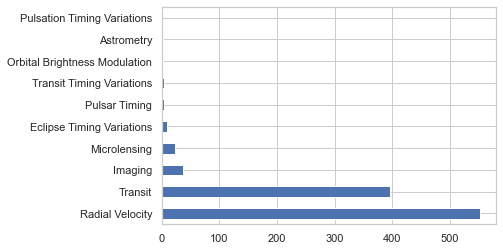

In [27]:
df['method'].value_counts().plot.barh()   # ===> barh Horizontal (Yatay Grafik)

<AxesSubplot:>

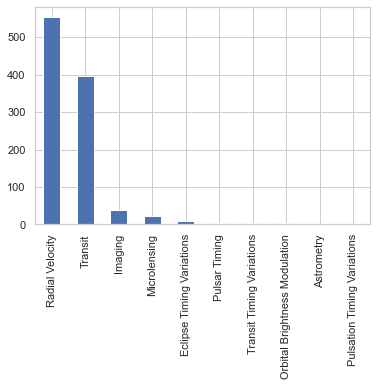

In [28]:
df['method'].value_counts().plot.bar() 

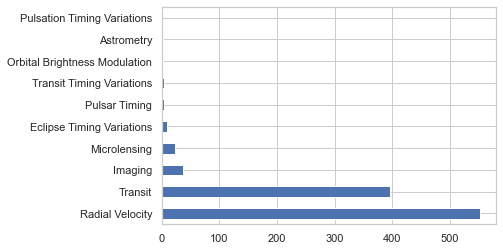

In [29]:
df['method'].value_counts().plot.barh(); # ; usteki yaziyi kapatir

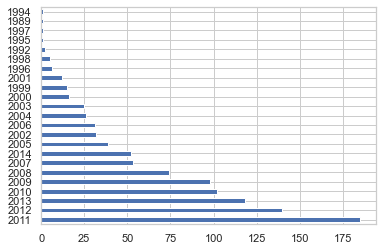

In [30]:
df['year'].value_counts().plot.barh();

# <font color='blue'>08) Surekli Degisken Ozellikleri</font>

In [31]:
df_num = df.select_dtypes(include= ['float64', 'int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.30,7.10,77.40,2006
1,1,874.77,2.21,56.95,2008
2,1,763.00,2.60,19.84,2011
3,1,326.03,19.40,110.62,2007
4,1,516.22,10.50,119.47,2009


In [32]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.00,1.79,1.24,1.00,1.00,1.00,2.00,7.00
orbital_period,992.00,2002.92,26014.73,0.09,5.44,39.98,526.00,730000.00
mass,513.00,2.64,3.82,0.00,0.23,1.26,3.04,25.00
distance,808.00,264.07,733.12,1.35,32.56,55.25,178.50,8500.00
year,1035.00,2009.07,3.97,1989.00,2007.00,2010.00,2012.00,2014.00


In [33]:
df['distance'].describe()

count    808.00
mean     264.07
std      733.12
min        1.35
25%       32.56
50%       55.25
75%      178.50
max     8500.00
Name: distance, dtype: float64

In [34]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [35]:
print("Ortalama: " + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: " + str(df_num["distance"].count())) 
print("Maksimum Değer: " + str(df_num["distance"].max()))
print("Minimum Değer: " + str(df_num["distance"].min()))
print("Medyan: " + str(df_num["distance"].median()))
print("Standart Sapma: " + str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


In [36]:
print("Ortalama: " , df_num["distance"].mean())

Ortalama:  264.06928217821786


# Dagilim Grafikleri

## Barplot

**Veri Seti Hikayesi (diamonds)**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

In [37]:
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


**Veri Setine Hizli Bakis**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.00,0.80,0.47,0.20,0.40,0.70,1.04,5.01
depth,53940.00,61.75,1.43,43.00,61.00,61.80,62.50,79.00
table,53940.00,57.46,2.23,43.00,56.00,57.00,59.00,95.00
price,53940.00,3932.80,3989.44,326.00,950.00,2401.00,5324.25,18823.00
x,53940.00,5.73,1.12,0.00,4.71,5.70,6.54,10.74
y,53940.00,5.73,1.14,0.00,4.72,5.71,6.54,58.90
z,53940.00,3.54,0.71,0.00,2.91,3.53,4.04,31.80


In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [41]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [42]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# <font color='red'>Ordinal Tanimlama</font>
### <font color='red'>Kategorik Degiskenler ordinal (kendi icinde dereceli) olarak tanitma</font>

In [43]:
from pandas.api.types import CategoricalDtype

In [44]:
df.cut = df.cut.astype(CategoricalDtype(categories = ['Fair', 'Good','Very Good', 'Premium', 'Ideal'], ordered = True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [45]:
# Categories icin liste Tanimlanabilir

cut_kategoriler = ['Fair', 'Good','Very Good', 'Premium', 'Ideal']

df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

# Dagilim Grafikleri 

#### Seaborn Documentation
#### Example Galery
#### https://seaborn.pydata.org/examples/index.html

## Barplot Grafigi

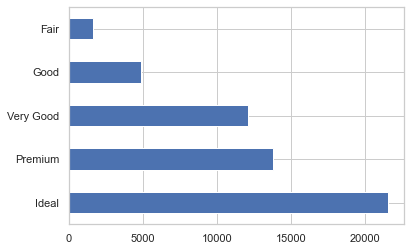

In [46]:
df['cut'].value_counts().plot.barh();

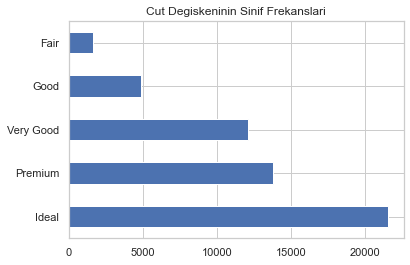

In [47]:
df['cut'].value_counts().plot.barh().set_title('Cut Degiskeninin Sinif Frekanslari');

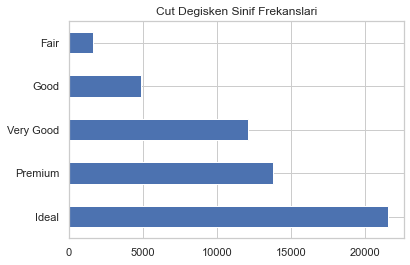

In [48]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('Cut Degisken Sinif Frekanslari'));

## <font color=red>01 - sns.barplot()</font>

<AxesSubplot:xlabel='cut'>

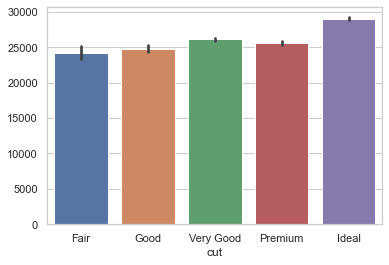

In [49]:
# Cut degisken Frekanslari
sns.barplot(x = 'cut', y = df.cut.index, data = df)

<AxesSubplot:xlabel='cut', ylabel='price'>

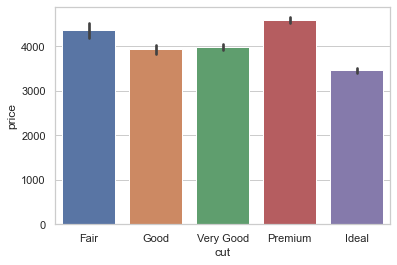

In [50]:
sns.barplot(x = 'cut', y = 'price', data = df)

<AxesSubplot:xlabel='cut'>

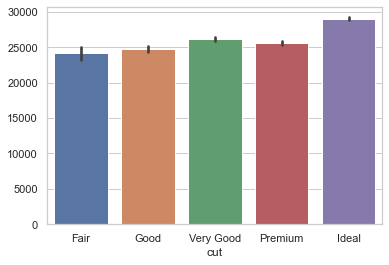

In [51]:
sns.barplot(x = 'cut', y = df.price.index, data = df)

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


## hue = ' '

### Dikey sutunu istenilen degere gore ayristiriyor

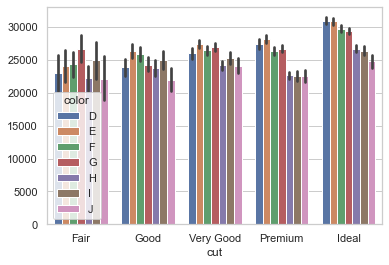

In [53]:
sns.barplot(x = 'cut', y = df.cut.index, data = df, hue = 'color' );

## Grafik Ayari

### Arka Temayi Cizgili Yapmak

In [54]:
sns.set_theme(style="whitegrid")

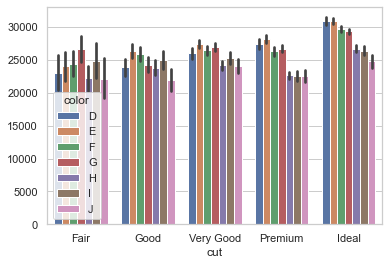

In [55]:
sns.barplot(x = 'cut', y = df.cut.index, data = df, hue = 'color' );

# Caprazlamalar

## <font color=red>02 - sns.catplot()</font>

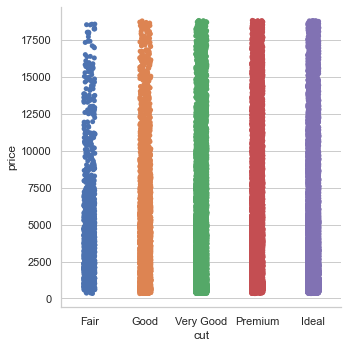

In [56]:
sns.catplot(x = 'cut', y = 'price', data = df);

In [57]:
df.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.00,4358.76,3560.39,337.00,2050.25,3282.00,5205.50,18574.00
Good,4906.00,3928.86,3681.59,327.00,1145.00,3050.50,5028.00,18788.00
Very Good,12082.00,3981.76,3935.86,336.00,912.00,2648.00,5372.75,18818.00
Premium,13791.00,4584.26,4349.20,326.00,1046.00,3185.00,6296.00,18823.00
Ideal,21551.00,3457.54,3808.40,326.00,878.00,1810.00,4678.50,18806.00


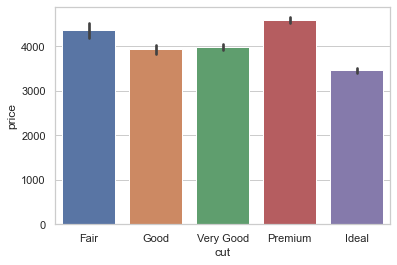

In [58]:
sns.barplot(x = 'cut', y = 'price', data = df);

## <font color='blue'>hue = ''  Argumani</font>

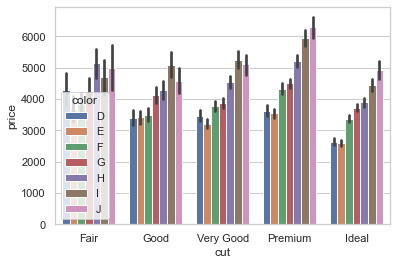

In [59]:
sns.barplot(x = 'cut', y = 'price', hue = 'color', data = df);

In [60]:
# Grafigi Dorulamak

df.groupby(['cut','color'])['price'].mean()

cut        color
Fair       D       4291.06
           E       3682.31
           F       3827.00
           G       4239.25
           H       5135.68
           I       4685.45
           J       4975.66
Good       D       3405.38
           E       3423.64
           F       3495.75
           G       4123.48
           H       4276.25
           I       5078.53
           J       4574.17
Very Good  D       3470.47
           E       3214.65
           F       3778.82
           G       3872.75
           H       4535.39
           I       5255.88
           J       5103.51
Premium    D       3631.29
           E       3538.91
           F       4324.89
           G       4500.74
           H       5216.71
           I       5946.18
           J       6294.59
Ideal      D       2629.09
           E       2597.55
           F       3374.94
           G       3720.71
           H       3889.33
           I       4451.97
           J       4918.19
Name: price, dtype: float64

# Histogram ve Yogunluk 

## <font color=red>03 - sns.distplot()</font>

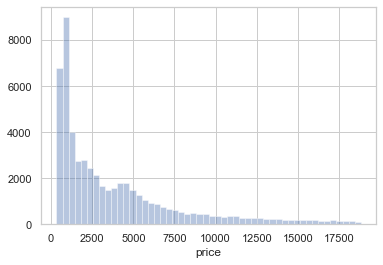

In [61]:
# Sayisal Degiskenlerin Dagilimi Hakkinda Bilgi

sns.distplot(df.price, kde = False);

## kde = True

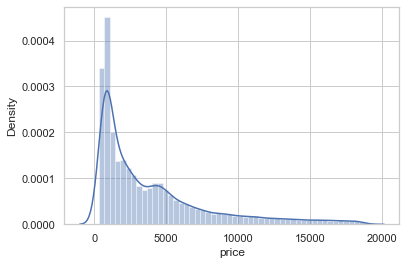

In [62]:
sns.distplot(df.price, kde = True );

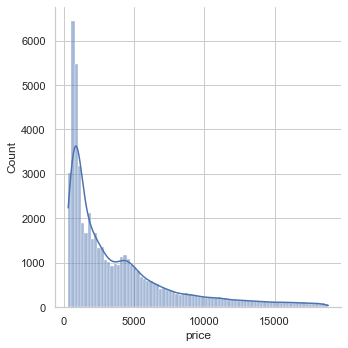

In [63]:
sns.displot(df.price, kde = True);

## bins = 10

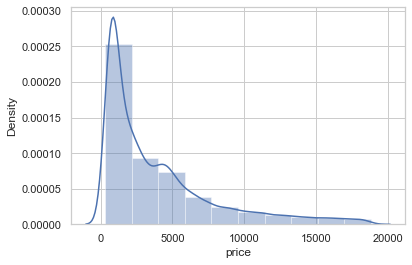

In [64]:
sns.distplot(df.price, bins = 10);

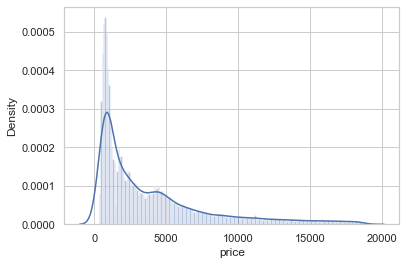

In [65]:
sns.distplot(df.price, bins = 200);

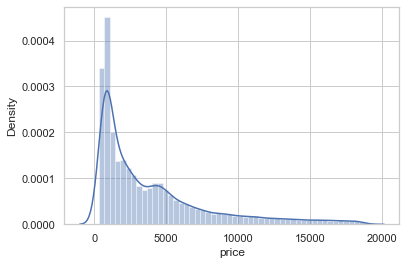

In [66]:
sns.distplot(df.price);

## hist = False

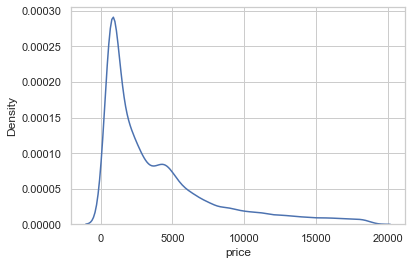

In [67]:
sns.distplot(df.price, hist = False);

In [68]:
# Grafik Yorumu
# iki tepeli yapi var , carpiklik var demek.

df.price.describe()

count   53940.00
mean     3932.80
std      3989.44
min       326.00
25%       950.00
50%      2401.00
75%      5324.25
max     18823.00
Name: price, dtype: float64

## <font color=red>04 - sns.kdeplot()</font>

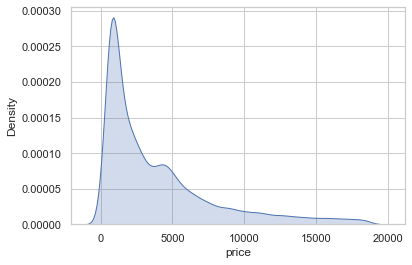

In [69]:
sns.kdeplot(df.price, shade = True);

## <font color=blue>sns.FacetGrid  ====> ust uste grafik gostermek icin></font>

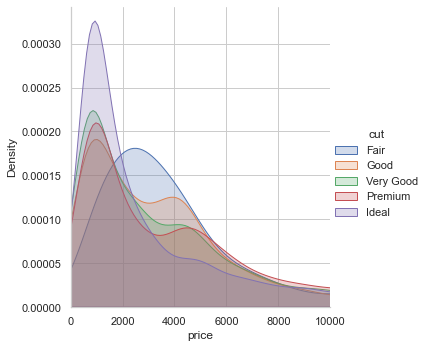

In [70]:
(sns
 .FacetGrid(df, 
              hue = 'cut',
              height = 5,
              xlim = (0,10000))
.map(sns.kdeplot, 'price', shade = True)
.add_legend()
);

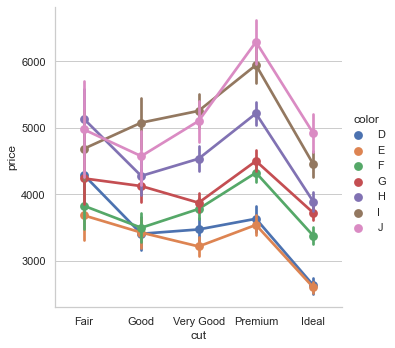

In [71]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point', data = df );

# Boxplot

## Veri Seti Hikayesi (tips)

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [72]:
#virgulden sonra gösterilecek olan sayı 4 basamak olarak ayarlanıyor.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.000,19.786,8.902,3.070,13.348,17.795,24.127,50.810
tip,244.000,2.998,1.384,1.000,2.000,2.900,3.562,10.000
size,244.000,2.570,0.951,1.000,2.000,2.000,3.000,6.000


## Kategorik DEgiskenlerin incelenmesi

In [75]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [76]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [77]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [78]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [79]:
df[['sex', 'day']].value_counts()

sex     day 
Male    Sat     59
        Sun     58
Female  Thur    32
Male    Thur    30
Female  Sat     28
        Sun     18
Male    Fri     10
Female  Fri      9
dtype: int64

## <font color=red>05 - sns.boxplot()</font>

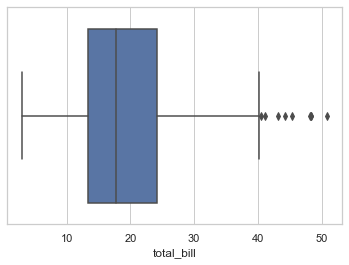

In [80]:
sns.boxplot(x = df['total_bill']);

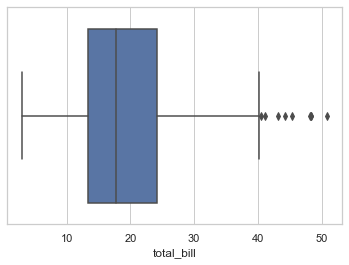

In [81]:
sns.boxplot(x = df['total_bill'], orient = 'v'); # ===> orient = 'v'  Calismadii!!!!!

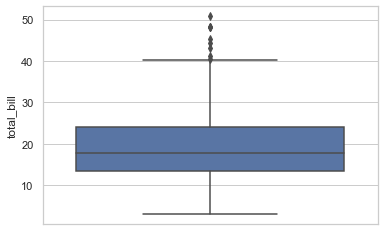

In [82]:
sns.boxplot(y = df['total_bill']);  # vertical yapmak ici y = 

In [83]:
sns.set_theme(style='whitegrid')

In [84]:
?sns.set_theme

Signature:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
Docstring:
Set aspects of the visual theme for all matplotlib and seaborn plots.

This function changes the global defaults for all plots using the
:ref:`matplotlib rcParams system <matplotlib:matplotlib-rcparams>`.
The themeing is decomposed into several distinct sets of parameter values.

The options are illustrated in the :doc:`aesthetics <../tutorial/aesthetics>`
and :doc:`color palette <../tutorial/color_palettes>` tutorials.

Parameters
----------
context : string or dict
    Scaling parameters, see :func:`plotting_context`.
style : string or dict
    Axes style parameters, see :func:`axes_style`.
palette : string or sequence
    Color palette, see :func:`color_palette`.
font : string
    Font family, see matplotlib font manager.
font_scale : float, optional
    Separate scaling factor to independently scale the 

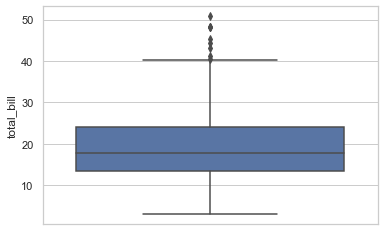

In [85]:
sns.boxplot(y = df['total_bill']); 

# Caprazlamalar

In [86]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.000,19.786,8.902,3.070,13.348,17.795,24.127,50.810
tip,244.000,2.998,1.384,1.000,2.000,2.900,3.562,10.000
size,244.000,2.570,0.951,1.000,2.000,2.000,3.000,6.000


In [88]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### Soru1) Hangi gunler daha fazla kazaniyoruz ?

In [89]:
df.pivot_table('total_bill', index='day')

,total_bill
day,
Thur,17.683
Fri,17.152
Sat,20.441
Sun,21.410


In [90]:
df.groupby('day')['total_bill'].mean()

day
Thur   17.683
Fri    17.152
Sat    20.441
Sun    21.410
Name: total_bill, dtype: float64

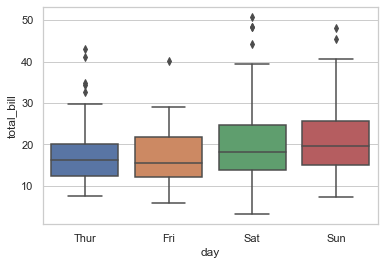

In [91]:
sns.boxplot(x = 'day', y = 'total_bill', data = df);

In [92]:
# Pazar daha az musteri var ama daha fazla para birakiyor
# Cumartesi en fazla musteri sayisi var

df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### Soru2) Sabah mi Aksam mi daha fazla kazaniyoruz ?

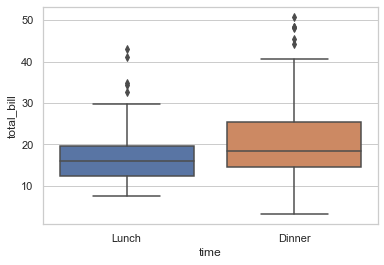

In [93]:
# Aksamlari daha fazla kaziniyoruz

sns.boxplot(x = 'time', y = 'total_bill', data =df);

### Soru3) Kisi sayisi ile kazanc arasindaki baglanti nasil ?

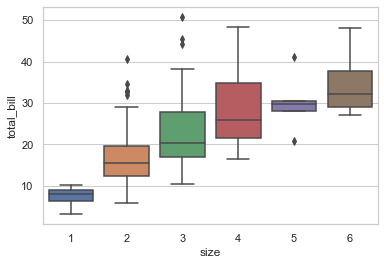

In [94]:
sns.boxplot(x = 'size', y = 'total_bill', data =df);

### Soru4) Gun , Kazan ve Cinsiyet Dagilimi nasil ?

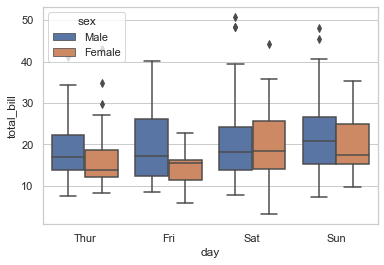

In [95]:
sns.boxplot(x= 'day', y= 'total_bill', hue= 'sex', data= df);

In [96]:
# Birde cinsiyet ekledim

df.pivot_table('total_bill', index= 'day', columns= 'sex')

sex,Male,Female
day,,
Thur,18.715,16.715
Fri,19.857,14.146
Sat,20.803,19.680
Sun,21.887,19.872


### Soru5) Gun, Kazanc ve Zaman Dagilimi

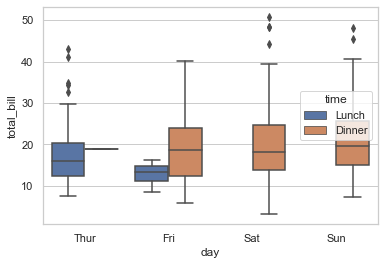

In [97]:
sns.boxplot(x= 'day', y= 'total_bill', hue= 'time', data= df );

# Violin Grafigi 

### Boxplot ve Yogunluk karisimi 
## <font color=red>06 - sns.catplot(x = , kind = 'violin', data =)</font>

In [98]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3
3,23.680,3.310,Male,No,Sun,Dinner,2
4,24.590,3.610,Female,No,Sun,Dinner,4


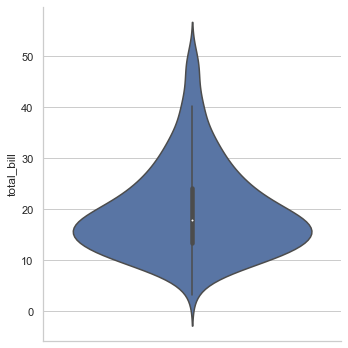

In [99]:
sns.catplot(y= 'total_bill', kind= 'violin', data= df);

### Violin Caprazlamalar

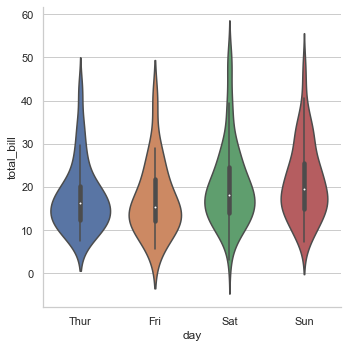

In [100]:
sns.catplot(x= 'day' ,y= 'total_bill', kind= 'violin', data= df);

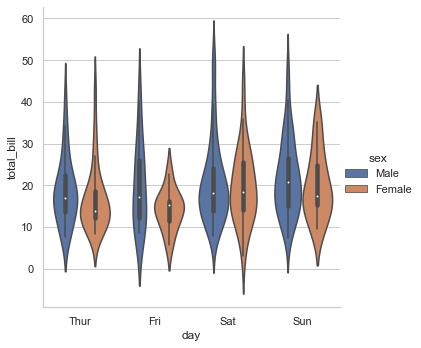

In [101]:
sns.catplot(x= 'day' ,y= 'total_bill', hue= 'sex', kind= 'violin', data= df);

<AxesSubplot:xlabel='day', ylabel='total_bill'>

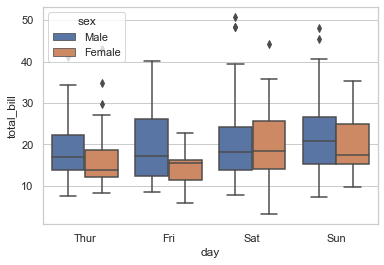

In [102]:
sns.boxplot(x= 'day' ,y= 'total_bill', hue= 'sex', data= df)

In [103]:
rs = np.random.RandomState(8)
type(rs)

numpy.random.mtrand.RandomState

# Korelasyon Grafikleri

## <font color=red>07 - sns.scatterplot()</font>

In [104]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.990,1.010,Female,No,Sun,Dinner,2
1,10.340,1.660,Male,No,Sun,Dinner,3
2,21.010,3.500,Male,No,Sun,Dinner,3


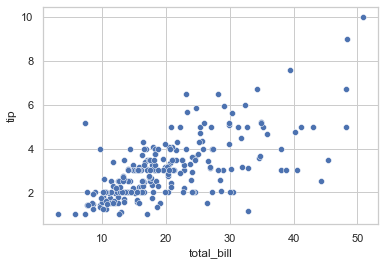

In [105]:
sns.scatterplot(x= 'total_bill', y= 'tip', data= df );

## Korelasyon Caprazlamalar

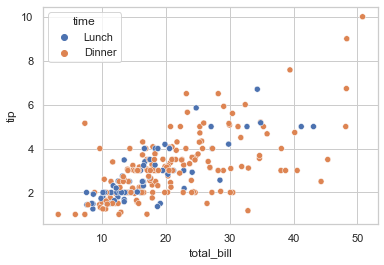

In [106]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'time', data= df);

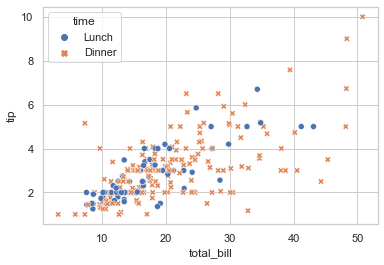

In [107]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'time', style= 'time', data= df);

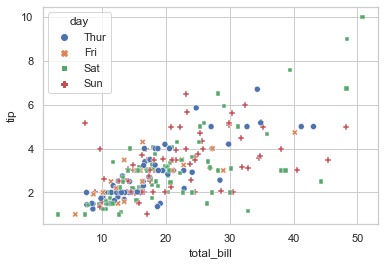

In [108]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'day', style= 'day', data= df);

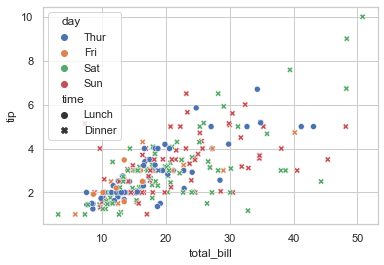

In [109]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue= 'day', style= 'time', data= df);

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

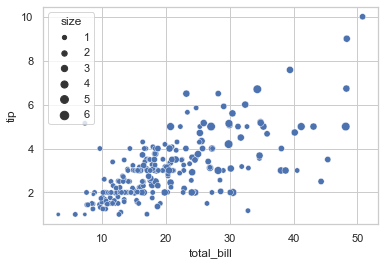

In [110]:
sns.scatterplot(x= 'total_bill', y= 'tip', size= 'size', data= df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

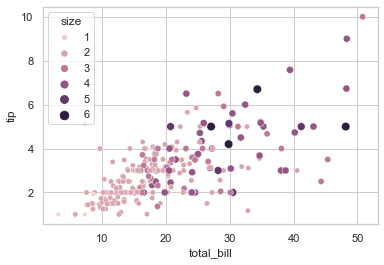

In [111]:
sns.scatterplot(x= 'total_bill', y= 'tip', hue = 'size', size= 'size', data= df)

# Dogrusal iliskinin Gosterilmesi

## <font color=red>08 - sns.lmplot()</font>

In [112]:
import matplotlib.pyplot as plt

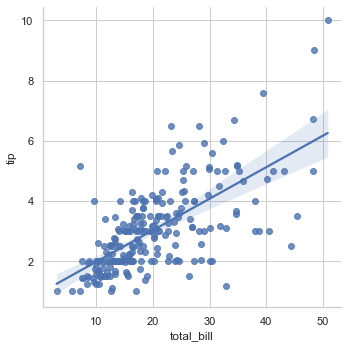

In [113]:
sns.lmplot(x= 'total_bill', y= 'tip', data= df);

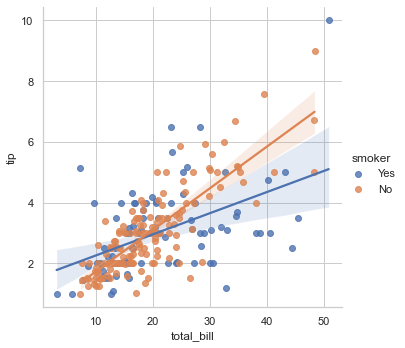

In [114]:
sns.lmplot(x= 'total_bill', y= 'tip', hue= 'smoker', data= df);

#### col= ''
#### Kolon ekleme

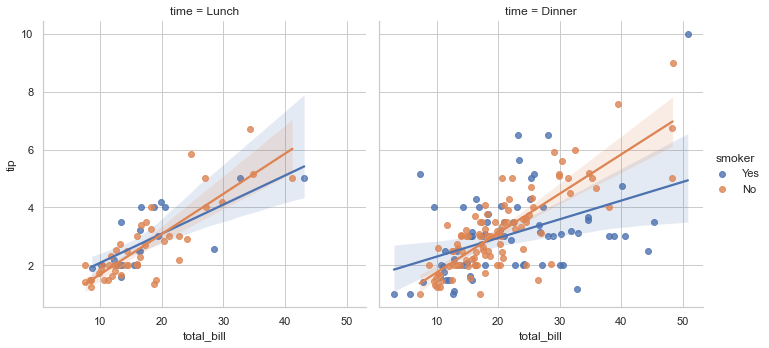

In [115]:
sns.lmplot(x= 'total_bill', y= 'tip', hue= 'smoker', col= 'time', data= df);

#### row= ''
#### Satir Ekleme

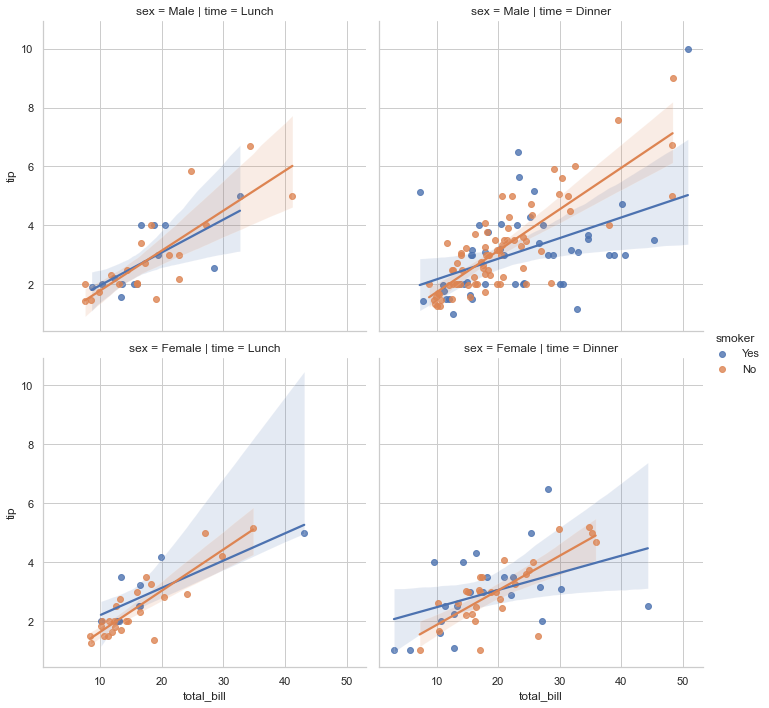

In [116]:
sns.lmplot(x= 'total_bill', y= 'tip', hue= 'smoker', col= 'time', row= 'sex',data= df);

# Scatterplot Matrisi

## <font color=red>09 - sns.pairplot()</font>

In [117]:
iris = sns.load_dataset('iris')
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [119]:
df.shape

(150, 5)

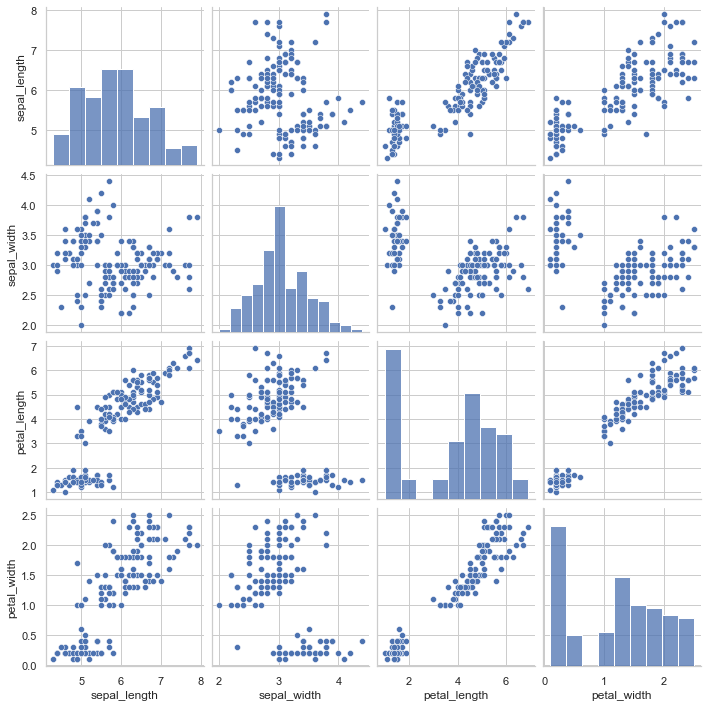

In [120]:
sns.pairplot(df);

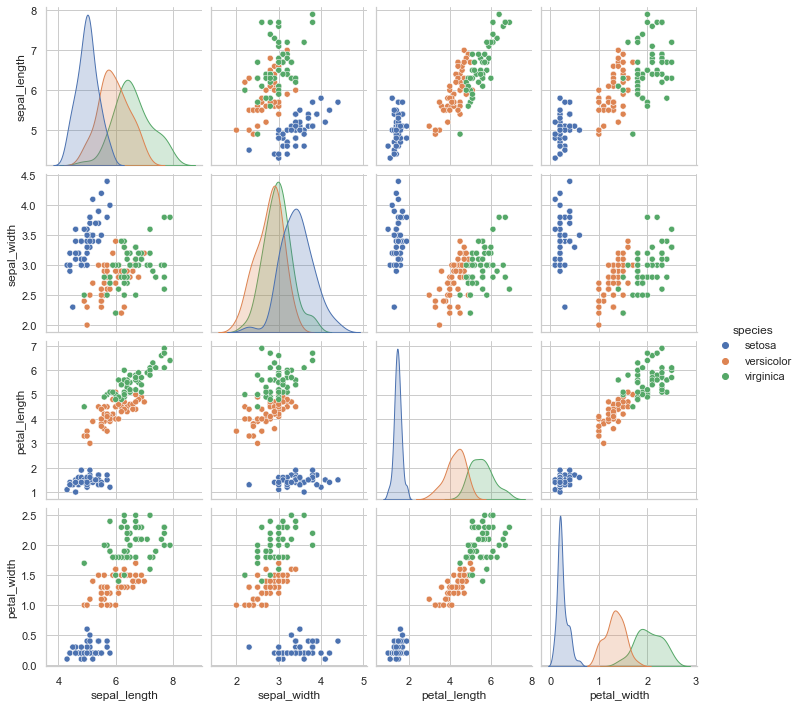

In [121]:
sns.pairplot(df, hue= 'species');

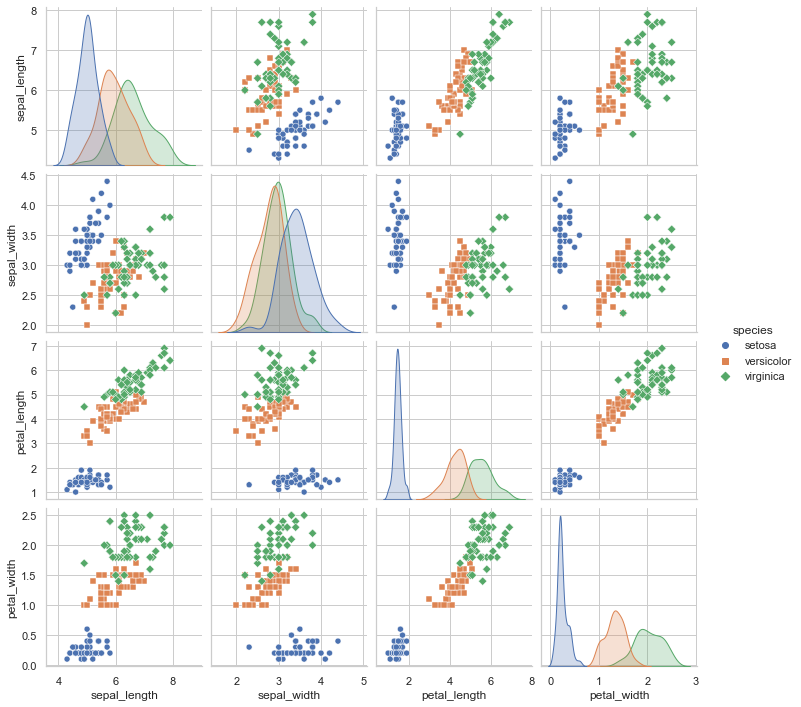

In [122]:
sns.pairplot(df, hue= 'species', markers= ['o', 's', 'D']);

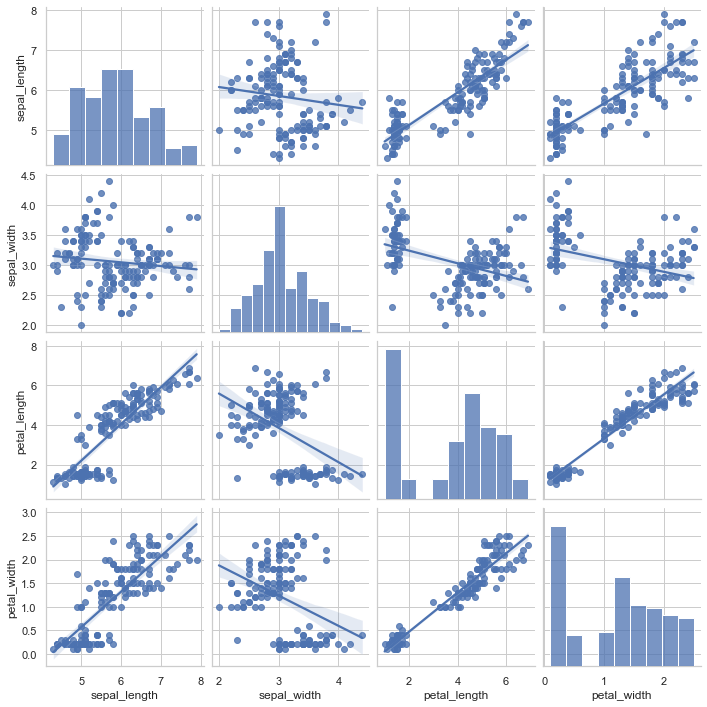

In [123]:
sns.pairplot(df, kind = 'reg');

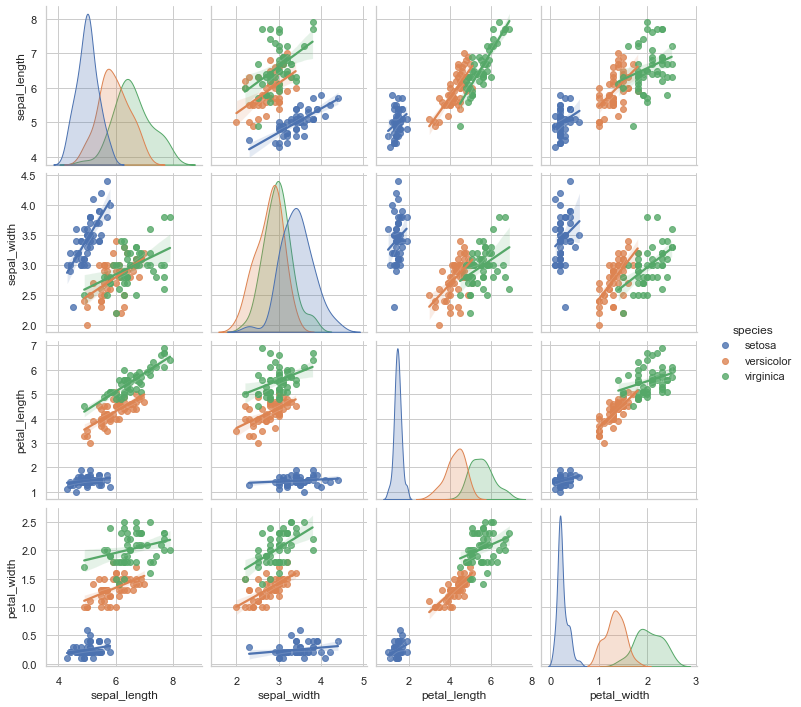

In [124]:
sns.pairplot(df, kind= 'reg', hue= 'species');

# Heatmap

### (Zamansal inceleme veya cok sinifli kategorik degisken inceleme)

In [125]:
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [127]:
df.passengers.describe()

count   144.000
mean    280.299
std     119.966
min     104.000
25%     180.000
50%     265.500
75%     360.500
max     622.000
Name: passengers, dtype: float64

In [128]:
# Dikkat Pivot_table DEgilllll, pivot yapiyoruz
# df.pivot(index= , column= , 'values')

df1 = df.pivot('month', 'year', 'passengers')
df1

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


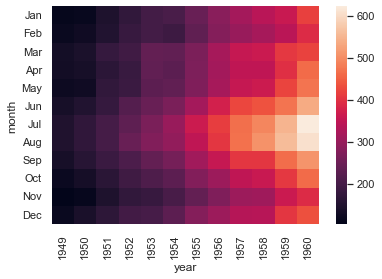

In [129]:
sns.heatmap(df1);

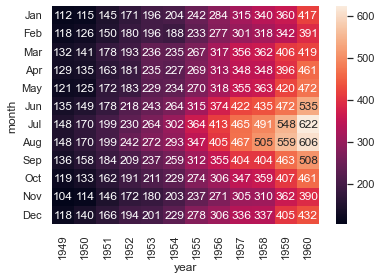

In [130]:
sns.heatmap(df1, annot= True, fmt= 'd');

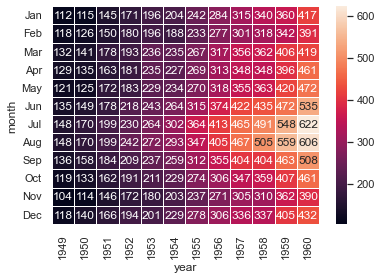

In [131]:
sns.heatmap(df1, annot= True ,fmt= 'd', linewidths= .5 );

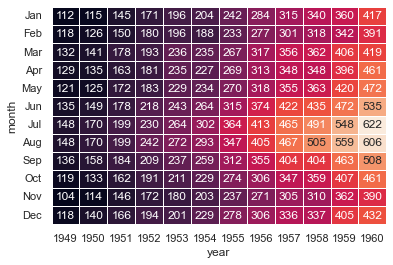

In [132]:
sns.heatmap(df1, annot= True, fmt= 'd', linewidths= .5, cbar= False);